In [1]:
from google_play_scraper import Sort, reviews_all
import pandas as pd

In [92]:
result = reviews_all(
        'gov.dukcapil.mobile_id',
        sleep_milliseconds=0, # defaults to 0
        lang='id', # defaults to 'en'
        country='id', # defaults to 'us'
        sort=Sort.NEWEST
    )

df = pd.DataFrame.from_records(result)
df = df[['at', 'content', 'score', 'userName']]

In [93]:
df.to_csv('Identitas_Kependudukan_Digital.csv')

In [100]:
filtered_df = pd.read_csv('Identitas_Kependudukan_Digital.csv')

In [103]:
df['at'] = pd.to_datetime(df['at'])

# Filter rows based on the condition: Timestamp >= '2023-01-01'
filtered_df = df[df['at'] >= '2023-11-1']

In [104]:
filtered_df #= filtered_df.head(300)

,at,content,score,userName
0,2023-12-11 05:04:51,"Sebenarnya untuk mempermudah, apalagi kalau ki...",2,Herlian Syach Channel
1,2023-12-12 23:36:04,"Banyak kekurangan Masih, Harusnya kalo memang ...",2,"Syahril, SP"
2,2023-12-21 22:06:53,Aplikasi hanya bisa dibuka pakai wifi tower..T...,4,rony setiawan
9,2023-11-05 21:53:01,Aplikasinya tdk bisa d gunakan..kesalahan kone...,1,Tedi Wungkul
10,2023-12-20 08:36:49,"Aplikasi nya susah sekali dibuka, padahal jari...",3,Fitri Fitri
...,...,...,...,...
16135,2023-12-19 17:48:30,Masalah koneksi,5,Amirullah Ullah
16136,2023-12-01 12:21:10,Good job,5,Firman Simalulung
16155,2023-12-16 11:57:56,Luar biasa,5,Irfan Khaeruzan
16156,2023-12-11 09:45:18,Sangat baik,5,deni junianto


# Text Preprocessing

In [105]:
import numpy as np
import pandas as pd
from gensim.utils import simple_preprocess

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


import re
import nltk

nltk.download('punkt')

from tqdm import tqdm
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

def stemmerSastrawi(text):
    return stemmer.stem(text)

def stopwordSastrawi(text):
    return stopword.remove(text)

def regex(text):
    text = text.lower()
    text = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',text) #remove symbol
    text = re.sub('[\s]+', ' ', text) #menghilangkan additional whitespace
    text = re.sub(r'[^\w\s]','',text) #remove punctuation
    text = text.strip() #menghilangkan enter, tab, dll
    return text

def ka_handling(text):
    tokens = text.split()
    for i,token in enumerate(tokens):
        if token in ka.keys():
            tokens[i] = ka[token]
    return ''.join(' '.join(x for x in tokens))

def addt_stop_word(sentence):
    words = word_tokenize(sentence)
    return ''.join(' '.join(w for w in words if not w.lower() in stop_words))

ka = pd.read_csv('kamus_alay.csv', encoding = "ISO-8859-1", header=None)
ka.columns = ['matab','mantap']
ka = {ka.matab[i]:ka.mantap[i] for i in range(0,len(ka.matab.values))}

stop_words = {'dan', 'di', 'ini', 'USER', 'User'}


def all_preproc(input_data):
    preproc = list(map(regex, input_data.values))
    preproc = list(map(ka_handling, preproc))
    preproc = list(map(stemmerSastrawi, tqdm(preproc)))
    #preproc = list(map(stopwordSastrawi, tqdm(preproc)))
    preproc = list(map(addt_stop_word, tqdm(preproc)))
    return preproc

filtered_df['contentp'] = filtered_df['content'].astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
filtered_df['contentp_clean'] = all_preproc(filtered_df['contentp'])



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\habib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\habib\AppData\Local\Temp\ipykernel_16328\2214020719.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['contentp'] = filtered_df['content'].astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
100%|██████████| 1585/1585 [00:00<00:00, 5737.35it/s]
C:\Users\habib\AppData\Local\Temp\ipykernel_16328\2214020719.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [42]:
filtered_df['contentp'] = filtered_df['content'].astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
filtered_df['contentp_clean'] = all_preproc(filtered_df['contentp'])

100%|██████████| 300/300 [00:00<00:00, 3166.39it/s]


In [43]:
filtered_df.to_csv('Identitas_Kependudukan_Digital.csv')

# Visualisasi dan Summary

### Histrogram Distribusi Panjang Text

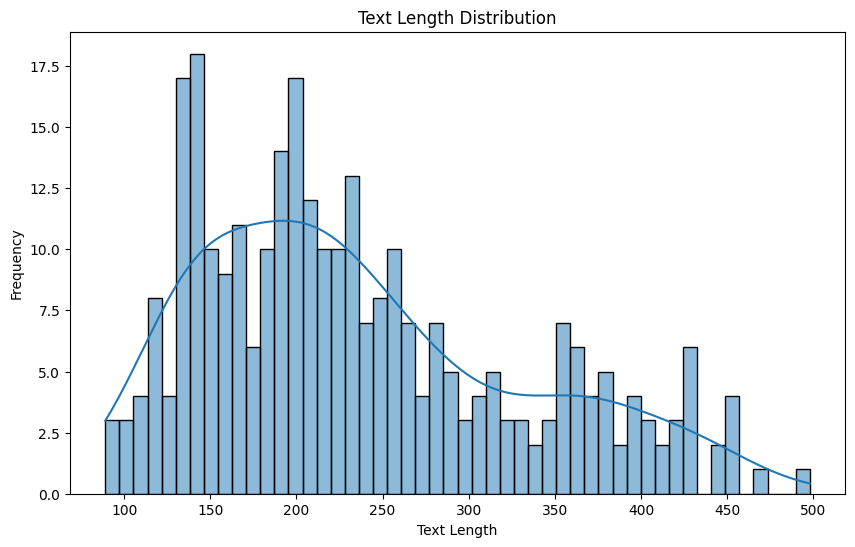

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

filtered_df['length'] = filtered_df['contentp_clean'].apply(len)

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='length', bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

### Bar Chart 20 Kata yang Paling Sering Muncul

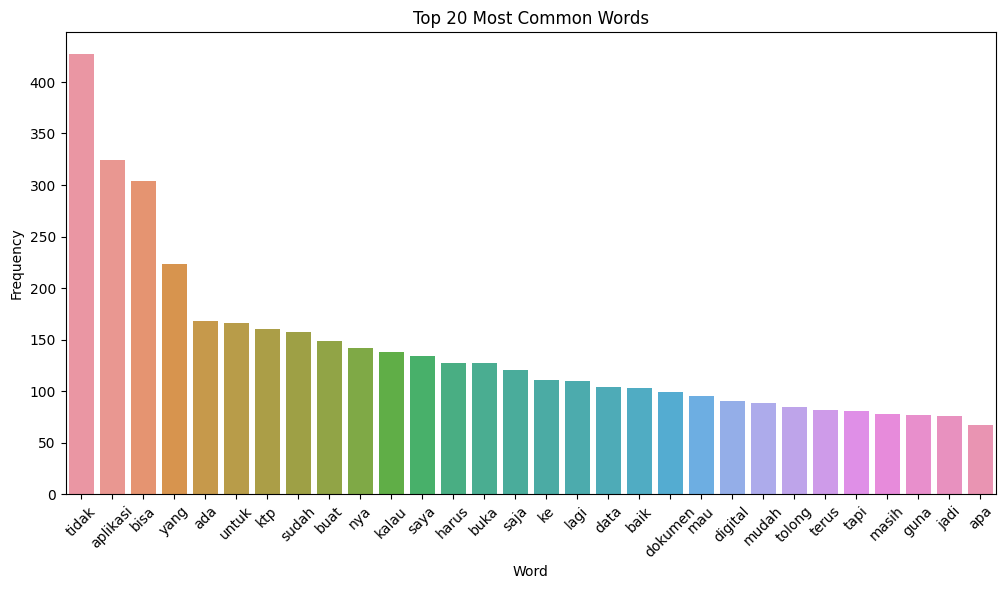

In [45]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenize and count word occurrences
word_counts = Counter(word_tokenize(' '.join(filtered_df['contentp_clean'])))
most_common_words = word_counts.most_common(30)  # Get the top 20 most common words

# Plot a bar chart for the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

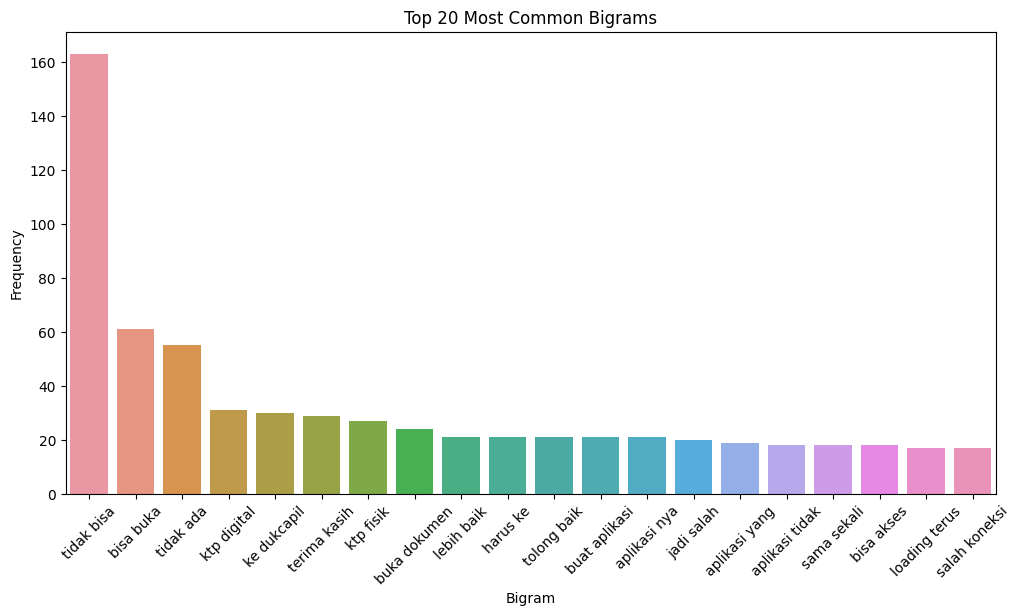

In [46]:
from nltk import bigrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Tokenize and create bigrams
tokenized_text = word_tokenize(' '.join(filtered_df['contentp_clean']))
bigram_counts = Counter(bigrams(tokenized_text))

# Get the top 20 most common bigrams
most_common_bigrams = bigram_counts.most_common(20)

# Plot a bar chart for the most common bigrams
plt.figure(figsize=(12, 6))
sns.barplot(x=[' '.join(bigram[0]) for bigram in most_common_bigrams], y=[bigram[1] for bigram in most_common_bigrams])
plt.title('Top 20 Most Common Bigrams')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

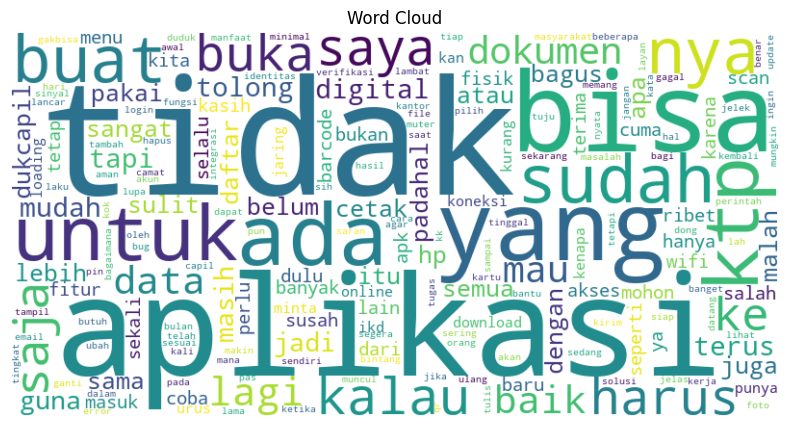

In [47]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Klasifikas

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [49]:
filtered_df['sentiment_first_scheme'] = filtered_df['score'].apply(lambda x: 'negative' if x in [1, 2] else 'positive')

# Sentiment analysis based on the second scheme
filtered_df['sentiment_second_scheme'] = filtered_df['score'].apply(lambda x: 'negative' if x in [1, 2] else ('neutral' if x == 3 else 'positive'))

In [50]:
filtered_df.sentiment_first_scheme.value_counts()

negative    235
positive     65
Name: sentiment_first_scheme, dtype: int64

In [51]:
filtered_df.sentiment_second_scheme.value_counts()

negative    235
neutral      39
positive     26
Name: sentiment_second_scheme, dtype: int64

In [52]:
filtered_df

,Unnamed: 0,at,content,score,userName,contentp,contentp_clean,sentiment_first_scheme,sentiment_second_scheme,length
0,0,2023-12-11 05:04:51,"Sebenarnya untuk mempermudah, apalagi kalau ki...",2,Herlian Syach Channel,sebenarnya untuk mempermudah apalagi kalau kit...,benar untuk mudah apalagi kalau kita telah mil...,negative,negative,248
1,1,2023-12-12 23:36:04,"Banyak kekurangan Masih, Harusnya kalo memang ...",2,"Syahril, SP",banyak kekurangan masih harusnya kalo memang t...,banyak kurang masih harus kalau memang tuju mu...,negative,negative,203
2,2,2023-12-21 22:06:53,Aplikasi hanya bisa dibuka pakai wifi tower..T...,4,rony setiawan,aplikasi hanya bisa dibuka pakai wifi tower ti...,aplikasi hanya bisa buka pakai wifi tower tida...,positive,positive,194
3,3,2023-10-24 23:00:47,"Tolong dong min, cara atasi dokumen gak bisa d...",4,Mas Riyan,tolong dong min cara atasi dokumen gak bisa di...,tolong dong minimal cara atas dokumen tidak bi...,positive,positive,209
4,4,2023-10-02 17:53:40,Sangat tidak mempermudah. Sangat tidak solutif...,1,Gilang Akbar El-Hakam,sangat tidak mempermudah sangat tidak solutif ...,sangat tidak mudah sangat tidak solutif kalau ...,negative,negative,452
...,...,...,...,...,...,...,...,...,...,...
295,312,2023-06-06 14:05:04,"Mantap deh,,,tidak harus ke dukcapil,,ke kecam...",5,Rini Karmila,mantap deh tidak harus ke dukcapil ke kecamata...,mantap deh tidak harus ke dukcapil ke camat ju...,positive,positive,185
296,315,2023-03-06 09:21:57,"Dari semua komentar yg ada, gak ada yg bilang ...",1,Paisal Da Silva,dari semua komentar yg ada gak ada yg bilang b...,dari semua komentar yang ada tidak ada yang bi...,negative,negative,192
297,316,2023-03-07 19:45:17,Secara apps perlu pengembangan. Secara fungsi ...,3,Ridwansyah_iwan,secara apps perlu pengembangan secara fungsi u...,cara aplikasi perlu kembang cara fungsi sudah ...,positive,neutral,212
298,318,2023-02-17 18:03:21,Hp dan jaringan semua bagus dan pengguna nya p...,1,nanang maulana,hp dan jaringan semua bagus dan pengguna nya p...,hp jaring semua bagus guna nya pun tidak gapte...,negative,negative,181


In [53]:
filtered_df = filtered_df[['contentp_clean', 'sentiment_first_scheme', 'score']]
missing_values = filtered_df['contentp_clean'].isna().sum()
if missing_values > 0:
    filtered_df['contentp_clean'].fillna('', inplace=True)

In [54]:
X = filtered_df['contentp_clean']  # Text data
y_binary = (filtered_df['sentiment_first_scheme'] == 'positive').astype(int)  # Binary labels (1 for positive, 0 for negative)
y_multi = filtered_df['score']  # Multi-class labels (original star ratings)

X_train, X_test, y_binary_train, y_binary_test, y_multi_train, y_multi_test = train_test_split(
    X, y_binary, y_multi, test_size=0.2, random_state=42)

In [55]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [56]:
X_train_tfidf_dense = X_train_tfidf.toarray()

# Print the TF-IDF representation
print("TF-IDF representation of X_train:")
print(X_train_tfidf_dense)

TF-IDF representation of X_train:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [57]:
binary_classifier = LogisticRegression()
binary_classifier.fit(X_train_tfidf, y_binary_train)
binary_predictions = binary_classifier.predict(X_test_tfidf)

In [58]:
print("Binary Classification Report:")
print(classification_report(y_binary_test, binary_predictions))

Binary Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       0.00      0.00      0.00        14

    accuracy                           0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60



c:\Users\habib\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\habib\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\habib\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [60]:
# Binary Classification with Random Forest and GridSearchCV
rf_classifier = RandomForestClassifier()
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train_tfidf, y_binary_train)
best_rf_model = grid_search_rf.best_estimator_
binary_predictions_rf = best_rf_model.predict(X_test_tfidf)

# Binary Classification with XGBoost and GridSearchCV
xgb_classifier = XGBClassifier()
param_grid_xgb = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5], 'learning_rate': [0.01, 0.1, 0.2]}
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=3, scoring='accuracy')
grid_search_xgb.fit(X_train_tfidf, y_binary_train)
best_xgb_model = grid_search_xgb.best_estimator_
binary_predictions_xgb = best_xgb_model.predict(X_test_tfidf)

# Evaluate binary classification model (Random Forest)
print("Binary Classification Report (Random Forest):")
print(classification_report(y_binary_test, binary_predictions_rf))

# Evaluate binary classification model (XGBoost)
print("Binary Classification Report (XGBoost):")
print(classification_report(y_binary_test, binary_predictions_xgb))

Binary Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       0.00      0.00      0.00        14

    accuracy                           0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60

Binary Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       0.00      0.00      0.00        14

    accuracy                           0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60



c:\Users\habib\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\habib\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\habib\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [69]:
def predict_sentiment(text):
    # Preprocess the input text (e.g., remove punctuation, lowercase, etc.)
    preprocessed_text = text.lower()  # Corrected line

    # Vectorize the preprocessed text using the TF-IDF vectorizer
    text_vectorized = tfidf_vectorizer.transform([preprocessed_text])

    # Predict sentiment using all three models
    rf_prediction = best_rf_model.predict(text_vectorized)
    xgb_prediction = best_xgb_model.predict(text_vectorized)
    logistic_prediction = binary_classifier.predict(text_vectorized)

    return {
        "Random Forest Prediction": "positive" if rf_prediction[0] == 1 else "negative",
        "XGBoost Prediction": "positive" if xgb_prediction[0] == 1 else "negative",
        "Logistic Regression Prediction": "positive" if logistic_prediction[0] == 1 else "negative",
    }

# Example usage:
sentiment_prediction = predict_sentiment(filtered_df['sentiment_first_scheme'].iloc[0])
print(sentiment_prediction)

{'Random Forest Prediction': 'negative', 'XGBoost Prediction': 'negative', 'Logistic Regression Prediction': 'negative'}


In [70]:
# Example usage:
input_text = "produknya oke, karyawannya juga ganteng dan tampan"
sentiment_prediction = predict_sentiment(input_text)
print(sentiment_prediction)

{'Random Forest Prediction': 'negative', 'XGBoost Prediction': 'negative', 'Logistic Regression Prediction': 'negative'}
